
# Descripción del Algoritmo HOG (Histogram of Oriented Gradients)

El descriptor HOG es una técnica para la extracción de características que se utiliza comúnmente en visión por computador, por ejemplo, para la detección de peatones. La idea principal consiste en:
  
1. **Preprocesamiento:** Convertir la imagen a escala de grises para simplificar el cálculo de gradientes.
2. **Cálculo del Gradiente:** Utilizar filtros (como Sobel) para obtener la magnitud y el ángulo del gradiente en cada píxel.
3. **División en Celdas:** Dividir la imagen en celdas (por ejemplo, 8x8 píxeles) y, para cada celda, calcular un histograma de orientaciones ponderado por la magnitud.
4. **Normalización por Bloques:** Agrupar celdas en bloques (por ejemplo, 2x2) y normalizar los histogramas para lograr invarianza a iluminación y contraste.
5. **Construcción del Vector de Características:** Concatenar los bloques normalizados para formar el descriptor HOG final.

A continuación, se implementa cada uno de estos pasos de manera modular.


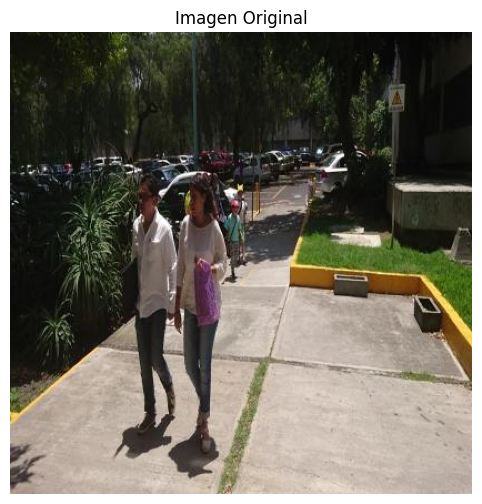

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import algoritmos.pruebaHog as ph


ruta_imagen1 = '../src/images/test/MOV_0572_mp4-7_jpg.rf.20fa68cf07d4cf30c7534fe8d53ca117.jpg'
ruta_image2 = '../src/images/test/seq_001996_jpg.rf.5ca557b1a02e0ba073ee7c7334d1b211.jpg'

imagen1 = cv2.imread(ruta_imagen1)

plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(imagen1, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis("off")
plt.show()

# Definicion de los parámetros

- **cell_size:** Tamaño píxeles de cada celda, donde se calcula el histograma del gradiente
- **block_size:** Número de celdas que conforman un bloque, utilizado para normalizar los histogramas.
- **bins:** Número de bins en el histograma de orientaciones, determina la granulaidad en la representación de los gradientes

A continuación se crea el objeto HOG mediante la clase hog_detect.

In [2]:
cell_size = 8  # Tamaño de la celda
block_size = 2  # Tamaño del bloque
bins = 9  # Número de bins

detector = ph.hog_detect(cell_size, block_size, bins)

## Función de Preprocesamiento

Esta función convierte la imagen a escala de grises (si es que está en color). Esto es importante para simplificar el cálculo de los gradientes.

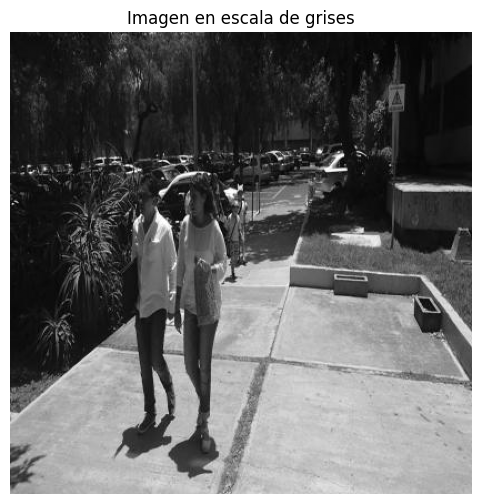

In [3]:
img1_gris = detector.preprocess(imagen1)

plt.figure(figsize=(8,6))
plt.imshow(img1_gris, cmap='gray')
plt.title("Imagen en escala de grises")
plt.axis("off")
plt.show()

## Cálculo de Gradientes

Se utilizan los filtros Sobel para obtener los gradientes en las direcciones X e Y. A partir de estos gradientes, se calcula la magnitud y el ángulo (en grados) para cada píxel.  
**Nota:** Los ángulos se ajustan al rango [0, 180) para trabajar con gradientes sin signo.



Magnitud del gradiente:
[[ 0.         2.         0.        ...  7.         0.         0.       ]
 [ 1.         2.236068   0.        ...  7.071068   2.         2.       ]
 [ 1.         1.4142135  1.        ...  8.062258   3.         2.       ]
 ...
 [22.        20.248457  18.867962  ...  8.062258   9.055386   2.       ]
 [ 6.        18.867962  16.763054  ...  8.944272  13.453624   9.       ]
 [ 0.         3.         0.        ...  1.         8.         0.       ]]
Ángulo del gradiente:
[[  0.         0.         0.       ...   0.         0.         0.      ]
 [ 90.        26.567108   0.       ... 171.87051    0.        90.      ]
 [ 90.        44.990448   0.       ... 172.87573    0.        90.      ]
 ...
 [ 90.       110.22915   32.00028  ... 150.25706  173.66061   90.      ]
 [ 90.       122.000275  72.64272  ... 116.56711  131.99557   90.      ]
 [  0.         0.         0.       ...   0.         0.         0.      ]]


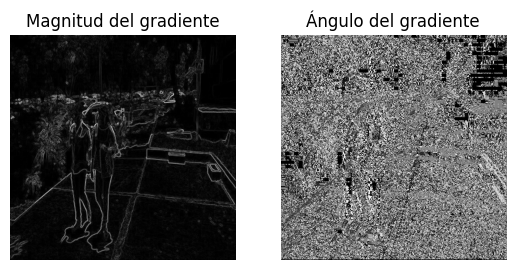

In [4]:
magnitude, angle = detector.compute_gradients(img1_gris)

plt.subplot(1, 2, 1)
plt.imshow(magnitude, cmap='gray')
plt.title("Magnitud del gradiente")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(angle, cmap='gray')
plt.title("Ángulo del gradiente")
plt.axis("off")

print("Magnitud del gradiente:")
print(magnitude)

print("Ángulo del gradiente:")
print(angle)

## Cálculo del Histograma por Celda

La imagen se divide en celdas de tamaño definido (por ejemplo, 8x8 píxeles).  
Para cada celda se calcula un histograma de orientaciones, donde cada contribución se pondera por la magnitud del gradiente.



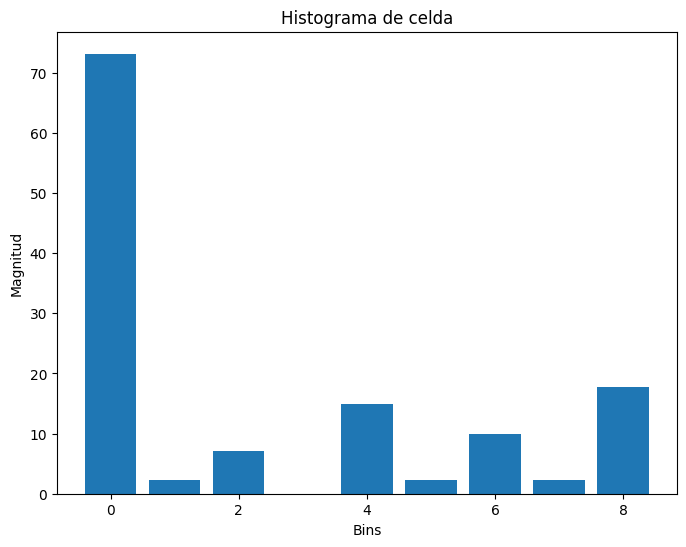

In [5]:
cell_hists = detector.compute_cell_histograms(magnitude, angle)

plt.figure(figsize=(8,6))
plt.bar(np.arange(bins), cell_hists[0, 0, :])
plt.title("Histograma de celda")
plt.xlabel("Bins")
plt.ylabel("Magnitud")
plt.show()

## Normalización por Bloques

Para lograr invarianza a variaciones en iluminación y contraste, se agrupan las celdas en bloques (por ejemplo, 2x2) y se normaliza el histograma de cada bloque utilizando la norma L2.



In [6]:
descriptor = detector.normalize_blocks(cell_hists)

print("Descriptor HOG:")
print(descriptor)




Descriptor HOG:
[0.51907042 0.01586442 0.05016769 ... 0.13652114 0.10206838 0.10612682]


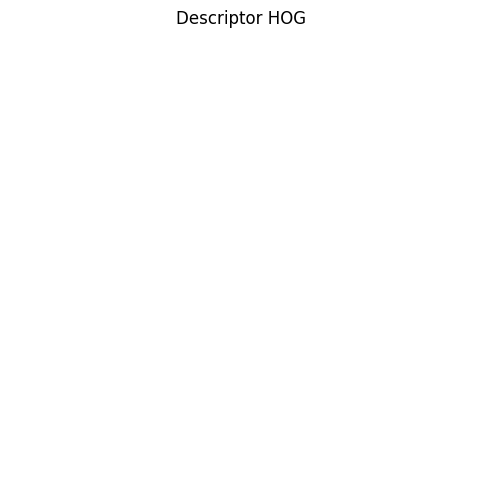

In [8]:
img_desc = detector.draw_hog_descriptor(cell_hists)

plt.figure(figsize=(8,6))
plt.imshow(img_desc, cmap='gray')
plt.title("Descriptor HOG")
plt.axis("off")
plt.show()
